# 1) Importing Main Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

# 2) Data Loading

In [4]:
df = pd.read_csv('PAT_FINAL.csv')

In [5]:
df.head(10)

,Name,Age,Net_Worth,Income Source,Citizenship
0,Paul Saville,66.0,$1.6 B,Real Estate,United States
1,Georg Haub,60.0,$2.2 B,Fashion & Retail,Germany
2,Arvind Tiku,52.0,$2.2 B,Energy,India
3,Bill Gross,77.0,$1.6 B,Finance & Investments,United States
4,Hartono Kweefanus,72.0,$1.2 B,Food & Beverage,Indonesia
5,Sandro Veronesi & family,62.0,$1.3 B,Fashion & Retail,Italy
6,Apoorva Mehta,35.0,$3.5 B,Technology,Canada
7,Kim Jun-ki,77.0,$1.4 B,Diversified,South Korea
8,Margaretta Taylor,79.0,$5.2 B,Media & Entertainment,United States
9,Scott Farquhar,42.0,$15.1 B,Technology,Australia


# 3) Data Understanding

### 3.1) Data Shape

In [6]:
df_shape = df.shape
df_shape

(2768, 5)

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* There are 2768 observation and 5 unique Features in this dataframe
</div>

### 3.2) Data Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           2768 non-null   object
 1   Age            2682 non-null   object
 2   Net_Worth      2768 non-null   object
 3   Income Source  2768 non-null   object
 4   Citizenship    2752 non-null   object
dtypes: object(5)
memory usage: 108.2+ KB


### 3.3) Data Missing

In [8]:
df.isnull().sum()

Name              0
Age              86
Net_Worth         0
Income Source     0
Citizenship      16
dtype: int64

<div class="alert alert-block alert-warning">
<b>Before Moving Further: </b> 
    
    
* We can see some missing values in two features ( Such as Age and Citizenship )
    
* We need to change the data-type for Age and Net-Worth before visualization or Analysis part
    
* And one important part is that when i was trying distplot , it was showing error because there are string values such as 'pharmaceuticals',etc. , so we will be using pd.to_numeric() to convert the Age into numeric and deal with missing values with mean 
    
* In Net Worth Feature, I'll be removing just 'B' from feature and convert it into Numeric (Float) and rename the column to Net_Worth_in_Billion
</div>

# 4) Data Quality and Feature Engeneering

### 4.1) Changing Data Type

In [9]:
# Converting 'Age' to numeric (float64) data type
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # 'coerce' will convert non-numeric values to NaN

In [10]:
# Converting 'Net_Worth' to numeric (float64) data type
df['Net_Worth'] = df['Net_Worth'].str.replace('$', '').str.replace('B', '').astype(float)

C:\Users\retee\AppData\Local\Temp\ipykernel_5688\2709614251.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Net_Worth'] = df['Net_Worth'].str.replace('$', '').str.replace('B', '').astype(float)


In [11]:
df.rename(columns={'Net_Worth': 'Net_Worth_in_Billions'}, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   2768 non-null   object 
 1   Age                    2660 non-null   float64
 2   Net_Worth_in_Billions  2768 non-null   float64
 3   Income Source          2768 non-null   object 
 4   Citizenship            2752 non-null   object 
dtypes: float64(2), object(3)
memory usage: 108.2+ KB


### 4.2) Dealing with Missing Values

* Apparently, we can deal with missing values of 'Age' feature by filling them with mean of particular citizenship age.
* However, For the 16 missing values in the "Citizenship" column, we could consider removing those rows which is less than 1% of the total data.

#### 4.2.1) Dealing with Citizenship Values

In [13]:
# Droping NaN values from 'Citizenship' Feature
df.dropna(subset=['Citizenship'], inplace=True)

#### 4.2.2) Dealing with Age Values

In [14]:
Age_mean_by_citizenship = df.groupby('Citizenship')['Age'].transform('mean')
df['Age'].fillna(Age_mean_by_citizenship, inplace=True)

In [15]:
# To Round up the data with no decimal point
df['Age'] = df['Age'].round()

In [16]:
df.isnull().sum()

Name                     0
Age                      6
Net_Worth_in_Billions    0
Income Source            0
Citizenship              0
dtype: int64

<div class="alert alert-block alert-danger">
<b>Key Findings: </b> 
    
* We can see that there are still missing values even after filling mean.The Possible reasons are that, mean age of those particular Citizenship are missing too, so lets find see the left over missing values
</div>


In [17]:
df[df.Age.isnull()]

,Name,Age,Net_Worth_in_Billions,Income Source,Citizenship
937,Sudhir & Samir Mehta,NaN,7.10,"Ahmedabad, India","Bachelor of Arts/Science, Gujarat University"
1599,Kapil & Rahul Bhatia,NaN,5.00,"Delhi, India","Bachelor of Science in Engineering, University..."
1677,Chandrakant & Rajendra Gogri,NaN,2.10,"Mumbai, India","Bachelor of Science in Engineering, University..."
1908,Rakesh Jhunjhunwala,NaN,5.50,India,"Chartered Accountant, The Institute of Charter..."
1911,Kuldip Singh & Gurbachan Singh Dhingra,NaN,9.40,"Delhi, India",Married
2692,Abhay Vakil,NaN,6.25,India,"Bachelor of Arts/Science, Syracuse University;..."


<div class="alert alert-block alert-warning">
<b>Warning: </b> 
    
* For some people Education has been written in Citizenship Column find those and change there citizenship to India
</div>

In [18]:
education_rows = df[df['Citizenship'].str.contains('Bachelor|B\.Com|Chartered Accountant', case=False, na=False)]
df.loc[education_rows.index, 'Citizenship'] = 'India'

In [36]:
# Removing any Invalid Countries from the dataframe
valid_citizenship = [
    'United States', 'Germany', 'India', 'Indonesia', 'Italy',
    'Canada', 'South Korea', 'Australia', 'China', 'Singapore',
    'Switzerland', 'Israel', 'Hong Kong', 'Lebanon', 'Philippines',
    'Thailand', 'Sweden', 'Turkey', 'Taiwan', 'Poland', 'Chile',
    'United Kingdom', 'Denmark', 'Tanzania', 'Brazil', 'Mexico',
    'Zimbabwe', 'Russia', 'Vietnam', 'Norway', 'Czechia', 'Malaysia',
    'Japan', 'Bulgaria', 'France', 'Argentina', 'Estonia', 'Hungary',
    'Spain', 'Romania', 'Finland', 'Monaco', 'Ukraine', 'Belgium',
    'Peru', 'New Zealand', 'Egypt', 'United Arab Emirates', 'Nigeria',
    'Slovakia', 'Cyprus', 'Colombia', 'Netherlands', 'Iceland',
    'Austria', 'Uruguay', 'Ireland', 'Greece', 'Algeria', 'Kazakhstan',
    'South Africa', 'Portugal', 'Georgia', 'Barbados', 'Qatar', 'Guernsey',
    'St. Kitts and Nevis', 'Eswatini (Swaziland)', 'Morocco', 'Macau',
    'Belize', 'Nepal', 'Venezuela', 'Oman', 'Liechtenstein'
]

df = df[df['Citizenship'].isin(valid_citizenship)]


In [19]:
print('New Shape of df after cleaning: {}'.format(df.shape))

New Shape of df after cleaning: (2752, 5)


#### 4.2.3) Age Data distribution

D:\SOftwares\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

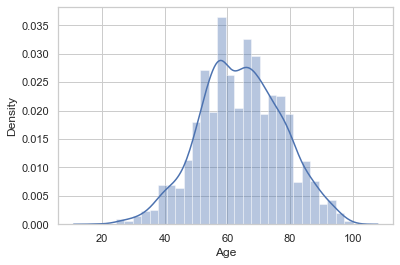

In [21]:
sns.distplot(df.Age)

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* Data is Symmetric !!
</div>

In [68]:
df.isnull().sum()

Name                     0
Age                      5
Net_Worth_in_Billions    0
Income Source            0
Citizenship              0
dtype: int64

<div class="alert alert-block alert-success">
<b>Data Cleaned!!!:</b> Sweet after we thoroughly cleaning and removing some features in the data, lets zoom to data visualisation and analysis part.
</div>

# 5) Data Analysis

# Q1: Which is the 8th country that has produced maximum number of billionaires?

In [22]:
sorted_citizenship = df['Citizenship'].value_counts().reset_index().sort_values(by='Citizenship', ascending=False).head(10)
sorted_citizenship.columns = ['Country', 'Billionaires Count']
print('The {} is the 8th country that has produced maximum number of billionaires of {}'.format(sorted_citizenship.iloc[7]['Country'],sorted_citizenship.iloc[7]['Billionaires Count']))

The Brazil is the 8th country that has produced maximum number of billionaires of 62


# Q2: How many Duplicate Values are present in the Dataframe
* Find Duplicate using Name

In [23]:
df[df.Name.duplicated()]

,Name,Age,Net_Worth_in_Billions,Income Source,Citizenship
645,Li Li,56.0,2.7,Healthcare,China
2600,Wang Yanqing & family,75.0,1.7,Manufacturing,China


In [24]:
print('There are {} duplicate (Name) values which are present in our dataframe'.format(df.Name.duplicated().sum()))

There are 2 duplicate (Name) values which are present in our dataframe


# Q3: Which is the industry with the highest and Lowest average net worth for billionaires in the Forbes dataset?
* Industry here refers to Income Source 
* Check for type mismatch errors before finding mean 
* You have to find the mean of all the similar Income Sources and find the highest among them and then lowest among them

In [25]:
df['Income Source'].unique()

array(['Real Estate ', 'Fashion & Retail ', 'Energy ',
       'Finance & Investments ', 'Food & Beverage ', 'Technology ',
       'Diversified ', 'Media & Entertainment ', 'Manufacturing ',
       'Healthcare ', 'Telecom ', 'Metals & Mining ', 'Automotive ',
       'Service ', 'chemicals, Self Made', 'Logistics ', 'biscuits',
       'Sports ', 'edtech, Self Made', 'Gambling & Casinos ',
       'Construction & Engineering ', 'steel', 'medical diagnostics',
       'software services, Self Made', 'financial technology, Self Made',
       'tractors', 'mining, metals, Self Made',
       'consumer goods, Self Made', 'construction, Self Made',
       'real estate', 'software services', 'paints', 'diversified',
       'chemicals', 'motorcycles', 'plastic pipes, Self Made',
       'consumer goods', 'pharmaceuticals', 'pharmaceuticals, Self Made',
       'healthcare, Self Made', 'cement', 'Ahmedabad, India',
       'cables & wires, Self Made', 'media, Self Made',
       'internet, Self Made', 'v

In [26]:
idustries_mean_net_worth = df.groupby('Income Source')['Net_Worth_in_Billions'].mean()
print('{} Industry has the highest avgerage net worth of ${} Billion'.format(idustries_mean_net_worth.idxmax(),idustries_mean_net_worth.max()))
print('{} Industry has the lowest avgerage net worth of ${} Billion'.format(idustries_mean_net_worth.idxmin(),idustries_mean_net_worth.min()))

commodities, infrastructure, Self Made Industry has the highest avgerage net worth of $74.8 Billion
financial technology, Self Made Industry has the lowest avgerage net worth of $1.1 Billion


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* **`Commodities ,Infrastructure, Self Made`** Industry has the Highest Average Net Worth 
* **`Financial ,Technology, Self Made`** Industry has the Lowest Average Net Worth 
</div>

# Q4: What is the distribution of the age of billionaires in the dataset? (Medium)
* PreProcess the Age column first either drop all the values that are not required or convert them to NAN {This is a very important step will be used in further questions as well} 

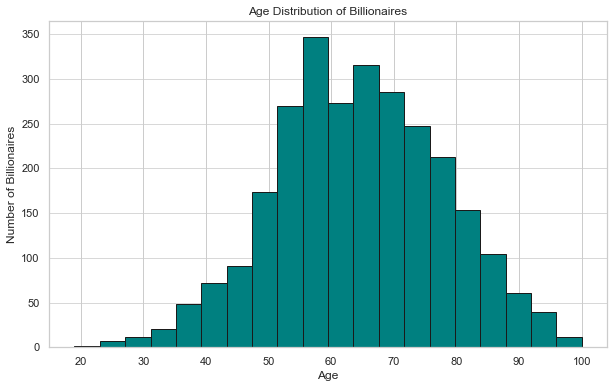

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='k',color='teal')
plt.title("Age Distribution of Billionaires")
plt.xlabel("Age")
plt.ylabel("Number of Billionaires")
plt.grid(axis='y', alpha=0.75)
plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* Majorly the Age data points lie between 50 to 80
</div>

# Q5: Who is the 10th Richest Indian Billionaire  (Medium)
* Drop the Duplicate Values using Name then proceed further

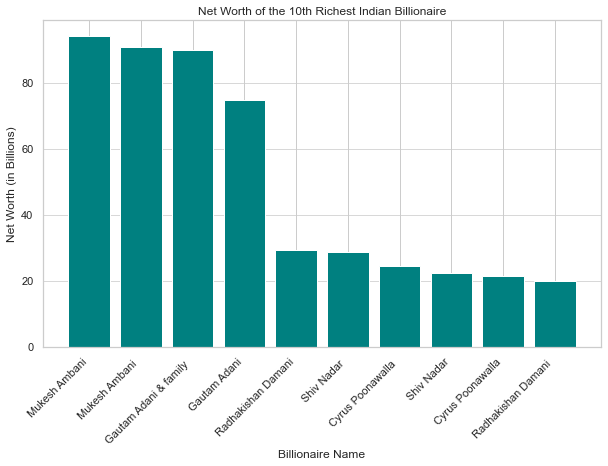

In [47]:
df = df.drop_duplicates(subset='Name')
indian_billionaires = df[df['Citizenship'] == 'India']
indian_billionaires = indian_billionaires.sort_values(by='Net_Worth_in_Billions', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(indian_billionaires['Name'], indian_billionaires['Net_Worth_in_Billions'], color='teal')

plt.title("Net Worth of the 10th Richest Indian Billionaire")
plt.xlabel("Billionaire Name")
plt.ylabel("Net Worth (in Billions)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', alpha=0.75)

plt.show()

In [29]:
indian_billionaires.iloc[9]

Name                     Radhakishan Damani 
Age                                     67.0
Net_Worth_in_Billions                   20.0
Income Source              Fashion & Retail 
Citizenship                            India
Name: 2259, dtype: object

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* Radhakishan Damani is the 10th Richest Indian Billionaire, who has current net worth of $20 Billions
</div>

# Q6: What is the average net worth of billionaires in the technology industry?
* Only find for billionaires having single Income Source 
* Dont consider billionaires having more than 1 Income Source

In [30]:
tech_billionaires = df[df['Income Source'] == 'Technology ']
print('Average Net Worth of billonaires Who are from Technology Industry : $ {} Billions'.format(round(tech_billionaires['Net_Worth_in_Billions'].mean(),2)))

Average Net Worth of billonaires Who are from Technology Industry : $ 6.35 Billions


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* Average Net Worth of billonaires Who are from Technology Industry : $ 6.35 Billions
</div>

# Q7: What is the position of the 10th Richest Billionaire from Tech Industry in the Forbes List (Medium)
* Create an Index showing the rank according to Net Worth (Sort then create index column)
* Then Proceed further with Technology as Income Source

In [31]:
tech_billionaires = tech_billionaires.sort_values(by='Net_Worth_in_Billions', ascending=False)
tenth_tech_billionaire = tech_billionaires.iloc[9]
position = df[df['Name'] == tenth_tech_billionaire['Name']].index[0] + 1  # Adding 1 for 1-based position
print('The 10th richest billionaire from the technology industry is at position {} in the Forbes list'.format(position))

The 10th richest billionaire from the technology industry is at position 380 in the Forbes list


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* The 10th richest billionaire from the technology industry is at position **380** in the Forbes list
</div>

# Q8: What is the total net worth of the top 100 billionaires in the Forbes dataset, and what percentage of the total net worth of all billionaires does this represent?
* Find Net Worth held by top 100 People
* Then find the percentage of the answer with the total net worth

In [32]:
df_sort = df.copy()
df_sort = df_sort.sort_values(by='Net_Worth_in_Billions', ascending=False)
top_100_bill = df_sort.head(100)
top_100_net_worth = top_100_bill['Net_Worth_in_Billions'].sum()
total_net_worth= df_sort['Net_Worth_in_Billions'].sum()

# Calculating the percentage of the total net worth represented by the top 100 billionaires
percentage = (top_100_net_worth / total_net_worth) * 100

print(f"The total net worth of the top 100 billionaires is: ${top_100_net_worth:.2f} billion")
print(f"This represents {percentage:.2f}% of the total net worth of all billionaires.")

The total net worth of the top 100 billionaires is: $4417.90 billion
This represents 33.17% of the total net worth of all billionaires.


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* The total net worth of the top 100 billionaires is:**$4417.90 billion**

* This represents **33.17%** of the total net worth of all billionaires.
</div>

# Q9: What is the average age of billionaires in the Technology industry? 

In [33]:

average_age_tech_bill = tech_billionaires['Age'].mean()

print('The average age of billionaires in the technology industry is: {} years'.format(round(average_age_tech_bill)))

The average age of billionaires in the technology industry is: 56 years


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* The average age of billionaires in the technology industry is: **56 years old Billionaires**
</div>

# Q10: Draw a Graph depicting mean Net Worth of billionaires per Country(Medium)
* For some people Education has been written in Citizenship Column find those and change there citizenship to India
* After doing  it plot the graph

<div class="alert alert-block alert-warning">
<b>Caution: </b> 
    
* I have already changed the Cititzenship values of their education to India in Data Cleaning Section
</div>

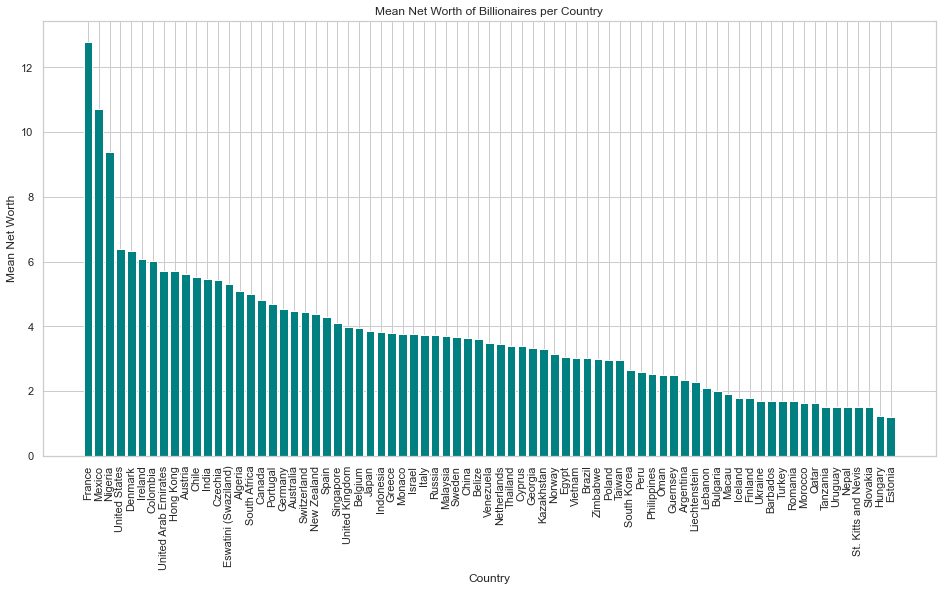

In [48]:
country_mean_net_worth = df.groupby('Citizenship')['Net_Worth_in_Billions'].mean().reset_index()

# Sorting the net worth in Descending order
country_mean_net_worth = country_mean_net_worth.sort_values(by='Net_Worth_in_Billions', ascending=False)

plt.figure(figsize=(16, 8))
plt.bar(country_mean_net_worth['Citizenship'], country_mean_net_worth['Net_Worth_in_Billions'], color='teal')
plt.title('Mean Net Worth of Billionaires per Country')
plt.xlabel('Country')
plt.ylabel('Mean Net Worth')
plt.xticks(rotation=90) 
plt.show()

# Q11: Top 5 industries that has the most billionaires?

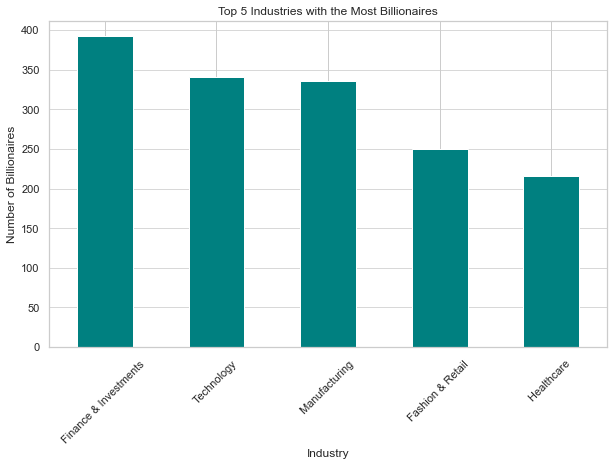

In [49]:
top_5_industry = df['Income Source'].value_counts().head(5)
plt.figure(figsize=(10, 6))
top_5_industry.plot(kind='bar', color='teal')
plt.title("Top 5 Industries with the Most Billionaires")
plt.xlabel("Industry")
plt.ylabel("Number of Billionaires")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* Investment and finance are the industries with the highest number of billionaires.
</div>

# Q12: Create a Violinplot that shows the distribution of Net Worths(Greater than 50B) across different Industries

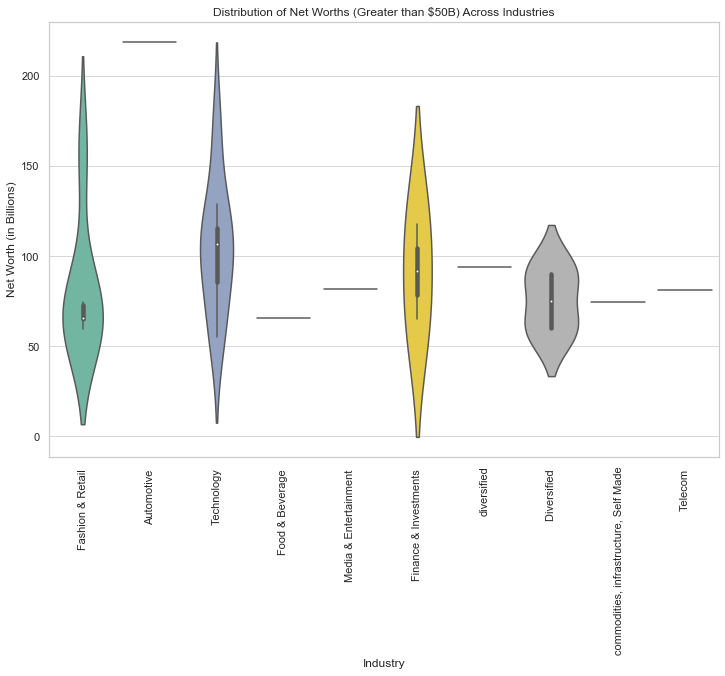

In [51]:
fifty_bill_worth = df[df['Net_Worth_in_Billions'] > 50]
plt.figure(figsize=(12, 8))
sns.violinplot(x='Income Source', y='Net_Worth_in_Billions', data=fifty_bill_worth, palette="Set2")
plt.title("Distribution of Net Worths (Greater than $50B) Across Industries")
plt.xlabel("Industry")
plt.ylabel("Net Worth (in Billions)")
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Q13: Create a Heatmap that shows the correlation between age and net worth for billionaires in the technology industry?

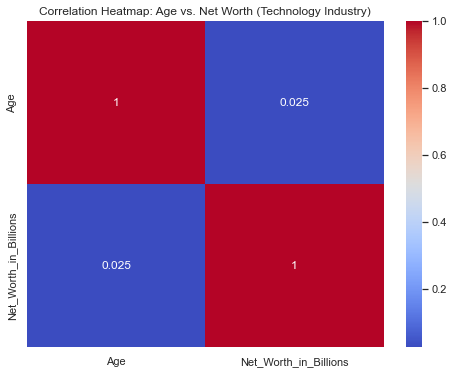

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=tech_billionaires[['Age', 'Net_Worth_in_Billions']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Age vs. Net Worth (Technology Industry)")
plt.show()

# Q14: What is the relationship between the age and net worth of billionaires from the top 10 countries? Create a scatter plot matrix to visualize it.

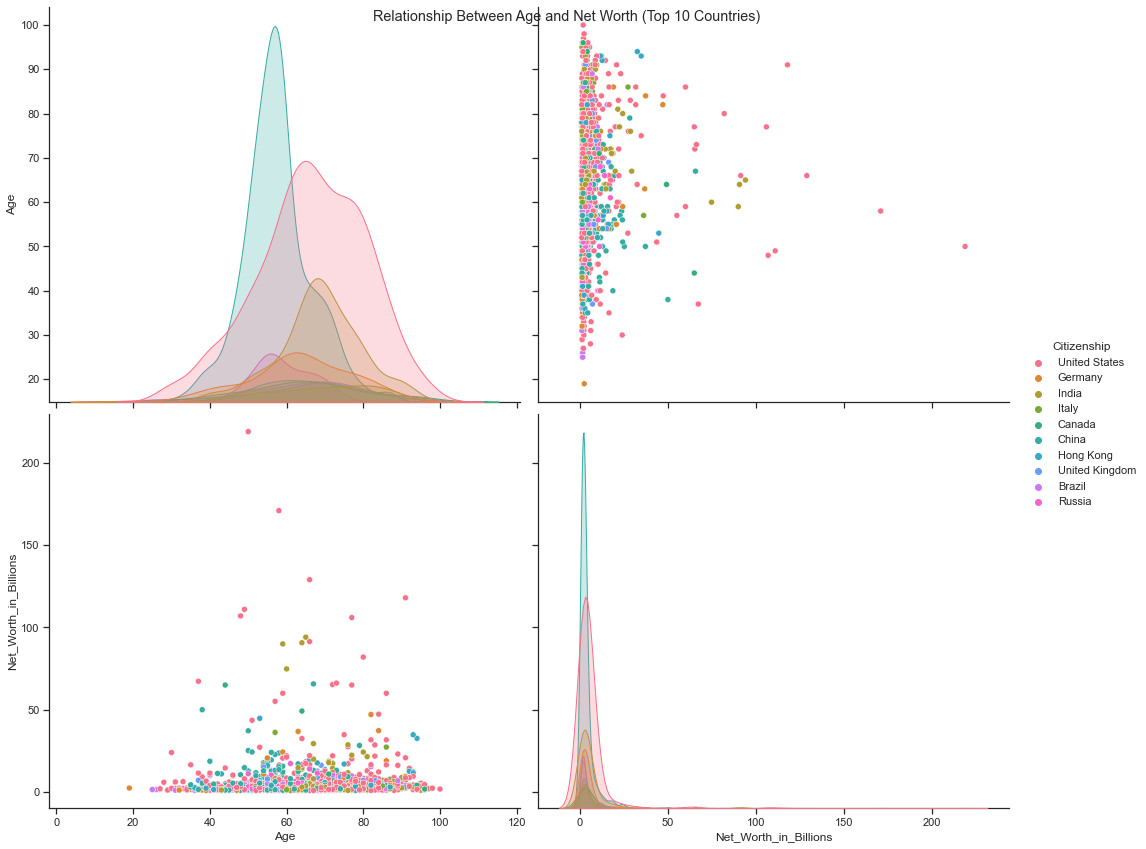

In [64]:
top_ten_citizenship =  df['Citizenship'].value_counts().head(10).index
top_ten_billionaires = df[df['Citizenship'].isin(top_ten_citizenship)]
sns.set(style="ticks")
sns.pairplot(top_ten_billionaires, vars=["Age", "Net_Worth_in_Billions"], hue="Citizenship", palette="husl",height=6, aspect=1.2)
plt.suptitle("Relationship Between Age and Net Worth (Top 10 Countries)")
plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    

* Each country has a large variety of net worth figures for billionaires of different ages.

    
* While the link is less obvious in certain nations, there is a general pattern in such countries that billionaires' net worth increases as they age.
    

* There are anomalies in several nations with remarkably large net worths at comparatively young ages.

    
* You may examine the distribution and trends of the age and net worth of billionaires in the top 10 nations by examining the scatter plots for each of the countries.
    

</div>

# Q15: What is the average age of billionaires in the USA? How does it compare to the average age of billionaires in other countries? 
* Find Mean of Age when Citizenship == USA
* Find Mean of Age when Citizenship is not equal to USA(All other countries other than USA)

In [67]:
average_usa_age = df[df['Citizenship'] == 'United States']['Age'].mean() # Averge age of USA Billionaires
average_other_country_age = df[df['Citizenship'] != 'United States']['Age'].mean() #Average age of other countries billionaires apart from USA
print(f"Average Age of Billionaires in the USA: {average_usa_age:.2f} years")
print(f"Average Age of Billionaires in Other Countries: {average_other_country_age:.2f} years")

Average Age of Billionaires in the USA: 66.45 years
Average Age of Billionaires in Other Countries: 63.61 years


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* Average Age of Billionaires in the USA: 66.45 years
    
* Average Age of Billionaires in Other Countries: 63.61 years
    

</div>